In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, r2_score

# --- Load and preprocess data ---
file_path = '/Users/rasmusmonsted/Desktop/Advanced BA/precipitation_imputed_data.parquet'
df = pd.read_parquet(file_path)
df = df.clip(lower=0, upper=60)

station = '05089'

/Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Modelling rainfall predictions with timeseries forecasting methods ##

To provide our model with predictions for future events we need to implement a model, which is able to predict future percipitation, based on past events. Initially, we planned on doing this using a time series forecast model. We could extend this process to include deep learning methods, by utilizing pre-built forecasting models, which are simple to use, and provide good results, without requiring us to tune parameterized models from scratch. 

After researching packages availiable to us, we landed on Meta's NeuralProphet. 

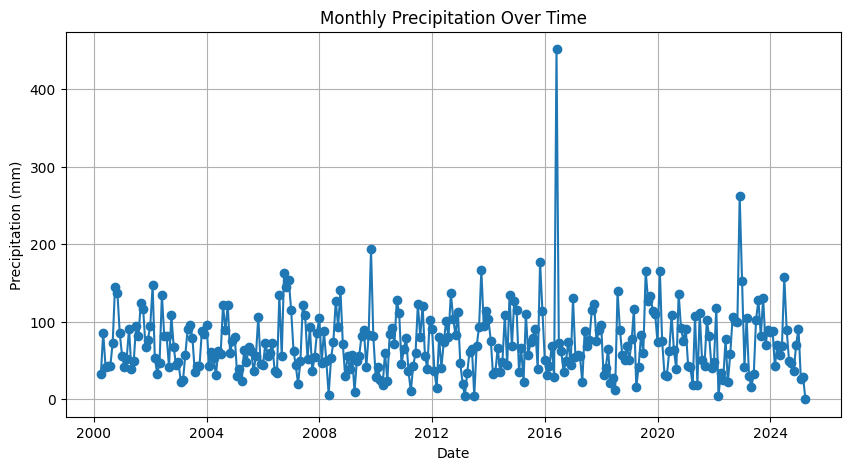

INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.583]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-01-01", periods=100, freq=freq_str))

WARNING - (py.warnings._showw

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (15) is too small than the required number                     for the learning rate finder (213). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 213/213 [00:02<00:00, 80.59it/s]


Training: |          | 0/? [00:24<?, ?it/s, v_num=15, train_loss=0.116, reg_loss=0.000, MAE=27.30, RMSE=36.40, Loss=0.116, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.583]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future versio

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.668]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:11

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


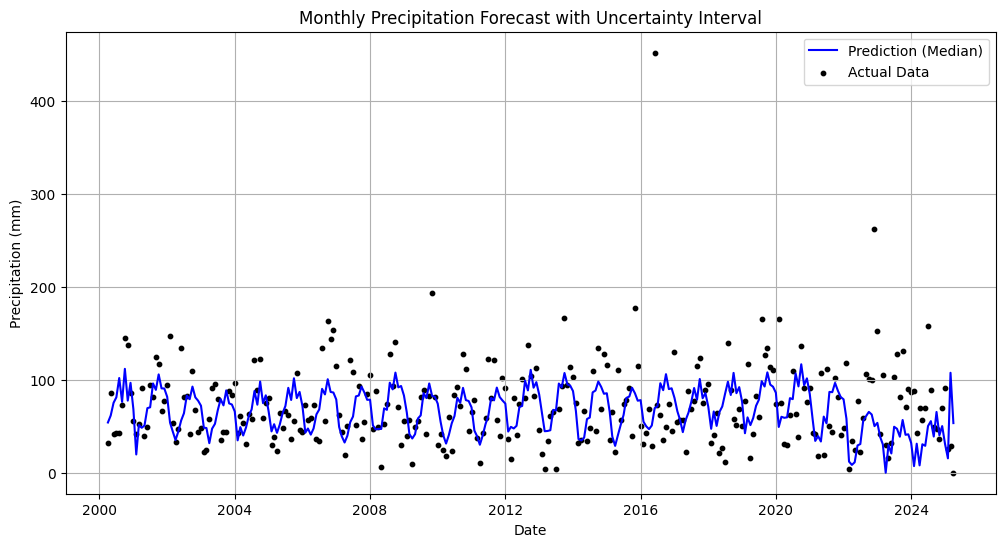

ERROR - (NP.plotly.plot_components) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` 

Test MAE: 38.78
Test R²: -0.33


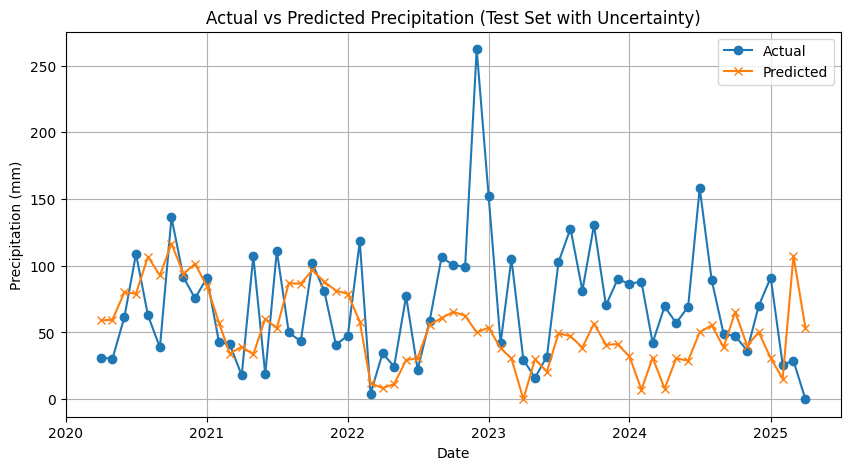

WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.668]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/rasmusmonsted/Library/Python/3.9/lib/python/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major fr

     train_loss  reg_loss        MAE       RMSE      Loss  RegLoss  epoch
175    0.115972       0.0  27.255590  36.408951  0.115972      0.0    175
176    0.115961       0.0  27.256145  36.668941  0.115961      0.0    176
177    0.115976       0.0  27.255194  36.398800  0.115976      0.0    177
178    0.115979       0.0  27.256521  36.577927  0.115979      0.0    178
179    0.115978       0.0  27.259233  36.431499  0.115978      0.0    179
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  9.74it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


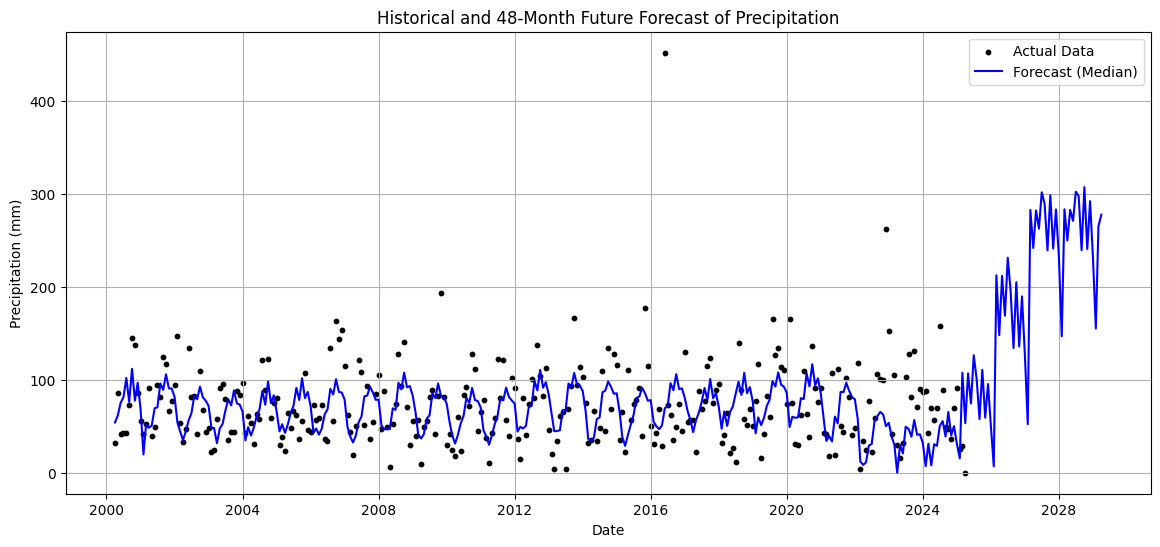

In [2]:
if station not in df.columns:
    raise ValueError("Expected column station not found.")

df[station] = df[station].clip(lower=0)
df = df[[station]]
df = df.reset_index()
df['date'] = df['index'].dt.date
df = df.rename(columns={station: 'precipitation'})
df = df.drop(columns='index')
df = df.dropna(subset=['precipitation']).reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.to_period('M')
df_monthly = df.groupby('year_month')['precipitation'].sum().reset_index()
df_monthly['year_month'] = df_monthly['year_month'].dt.to_timestamp()
df_prophet = df_monthly.rename(columns={'year_month': 'ds', 'precipitation': 'y'})

# --- Quick data exploration ---
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], marker='o')
plt.title('Monthly Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

# --- Train-test split for evaluation ---
split_idx = int(len(df_prophet) * 0.8)
df_train = df_prophet.iloc[:split_idx]
df_test = df_prophet.iloc[split_idx:]

# --- Initialize NeuralProphet model ---
m = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    #seasonality_mode='multiplicative',
    n_changepoints=20,
    changepoints_range=0.9,
    trend_reg=1,
    quantiles=[0.1, 0.9]
)

m = m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# --- Fit model on training set ---
metrics = m.fit(df_train, freq='M')

# --- Forecast on train + test periods ---
future = m.make_future_dataframe(df_train, periods=len(df_test), n_historic_predictions=True)
forecast = m.predict(future)

# --- Plot forecast including quantiles ---
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat1'], label='Prediction (Median)', color='blue')
if 'yhat1_lower' in forecast.columns and 'yhat1_upper' in forecast.columns:
    plt.fill_between(forecast['ds'], forecast['yhat1_lower'], forecast['yhat1_upper'], color='blue', alpha=0.3, label='80% Prediction Interval')
plt.scatter(df_prophet['ds'], df_prophet['y'], color='black', s=10, label='Actual Data')
plt.title('Monthly Precipitation Forecast with Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot model components (trend, seasonality, etc.) ---
fig_components = m.plot_components(forecast)

# --- Plot model parameters ---
fig_parameters = m.plot_parameters()

# --- Evaluation on test set ---
forecast_test = forecast.iloc[-len(df_test):]
mae = mean_absolute_error(df_test['y'].values, forecast_test['yhat1'].values)
r2 = r2_score(df_test['y'].values, forecast_test['yhat1'].values)
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.2f}")

# --- Plot actual vs predicted for test period ---
plt.figure(figsize=(10, 5))
plt.plot(df_test['ds'], df_test['y'], label='Actual', marker='o')
plt.plot(df_test['ds'], forecast_test['yhat1'], label='Predicted', marker='x')
if 'yhat1_lower' in forecast_test.columns and 'yhat1_upper' in forecast_test.columns:
    plt.fill_between(df_test['ds'], forecast_test['yhat1_lower'], forecast_test['yhat1_upper'], color='blue', alpha=0.2, label='80% Interval')
plt.title('Actual vs Predicted Precipitation (Test Set with Uncertainty)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# --- Print final few metrics ---
print(metrics.tail())
# --- Forecast next 48 months into the future ---
future_48 = m.make_future_dataframe(df_prophet, periods=48, n_historic_predictions=True)  # <--- notice: True
forecast_48 = m.predict(future_48)

# --- Plot historical + forecasted precipitation together ---
plt.figure(figsize=(14, 6))

# Plot historical observed data
plt.scatter(df_prophet['ds'], df_prophet['y'], color='black', s=10, label='Actual Data')

# Plot fitted values (up to today)
plt.plot(forecast_48['ds'], forecast_48['yhat1'], label='Forecast (Median)', color='blue')

# Plot uncertainty if available
if 'yhat1_lower' in forecast_48.columns and 'yhat1_upper' in forecast_48.columns:
    plt.fill_between(forecast_48['ds'], forecast_48['yhat1_lower'], forecast_48['yhat1_upper'], color='blue', alpha=0.3, label='80% Prediction Interval')

plt.title('Historical and 48-Month Future Forecast of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

